# Example - 76 - Uranus Aerocapture - Mission Concept Study

In this example, we illustrate the use of AMAT for a preliminary analysis of an aerocapture mission concept to Uranus.

**Ground Rules and Assumptions**:

1. The mission must launch between 2028 and 2038, and arrive at Uranus no later than 8 years after launch.
2. The nominal orbiter and probe mass is 1700 kg and 300 kg respectively. 
3. The launch vehicle should be capable of launching a spacecraft at least 4000 kg in mass, assuming 2000 kg of useful delivered mass to Uranus orbit and 2000 kg of aerocapture system mass (including propellant for any deep space manuevers). 
4. Including 20% mass margin, the launch vehicle must have a launch capability of at least 5000 kg.
5. The aerocapture vehicle will have a maximum L/D of 0.24 (using an MSL-derived aeroshell).
6. The mission design must allow at least 1 deg. of theoretical corridor width (TCW) at Uranus.
7. The maximum deceleration load is not to exceed 15g.
8. The maximum stagnation-point peak heat rate is not to exceed 5000 W/cm^2.
9. The maximum stagnation-point total heat load is not to exceed 200 kJ/cm^2.
10. The mission must place the orbiter into an orbit with a near polar inclination.
11. The maximum capability launch vehicle available is the Falcon Heavy Expendable.
12. The initial capture orbit shall have an apoapsis altitude of 550,000 km.

We use an existing feasibility chart from Girija et al. (2022) [Girija A. P. et al. Quantitative Assessment of Aerocapture and Applications to Future Missions, Journal of Spacecraft and Rockets, 2022](https://athulpg007.github.io/papers/1.a35214.pdf) for preliminary analysis. 

## Tradespace Exploration

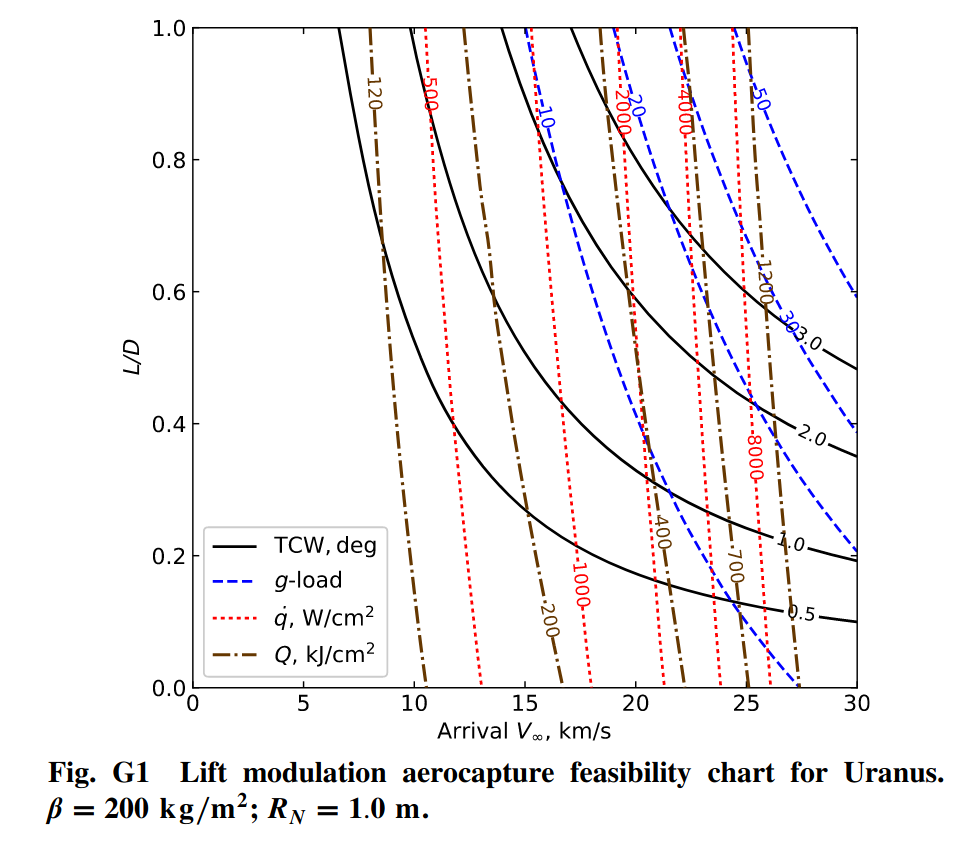

In [107]:
from IPython.display import Image
Image(filename="../plots/uranus-feasibility-chart-girija-et-al-2022.png", width=700)

**Derived Mission Requirements**:

1. Because of the assumption #5 that the maximum allowed vehicle L/D is 0.24, and assumption #6 that a 1 deg TCW is required, we immediately see that the interplanetary trajectory arrival $V_{\infty}$ must be at least 20 km/s. This implies a high-energy trajectory is required. Because of requirement #8 that the maximum heat rate is not to exceed 5000 $W/cm^2$, we limit the maximum arrival $V_{\infty}$ to 24 km/s.

Let us now look at the available high-energy trajectory options to Uranus which satisfy the above derived mission requirement. We will first look at the launch capability vs launch date chart using AMAT. Requirement #4 states that the launch capability shoud be at least 5000 kg.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [109]:
from AMAT.launcher import Launcher
from AMAT.interplanetary import Interplanetary

In [110]:
interplanetary1 = Interplanetary(ID="Uranus High Energy",
                                 datafile='../interplanetary-data-private/uranus/uranus-high-energy.xlsx',
                                 sheet_name='Sheet1',
                                 Lcdate_format=None)

launcher1 = Launcher('Falcon Heavy Exp. with kick',
                     datafile='../launcher-data/falcon-heavy-expendable-w-star-48.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


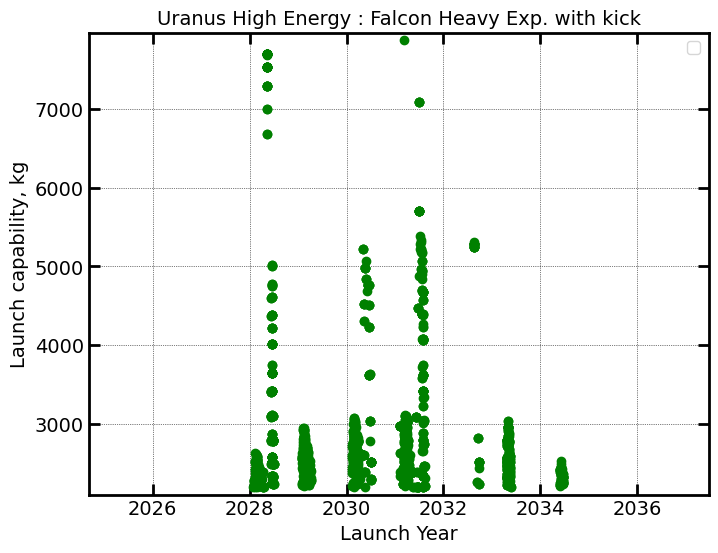

In [111]:
interplanetary1.plot_launch_mass_vs_launch_date(launcherObj=launcher1)

It appears that there are some trajectories which have a launch capability exceeding 5000 kg within the desired launch window. Let us now look at the trajectories with launch mass, time of flight and arrival $V_{\infty}$ combined in one chart.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


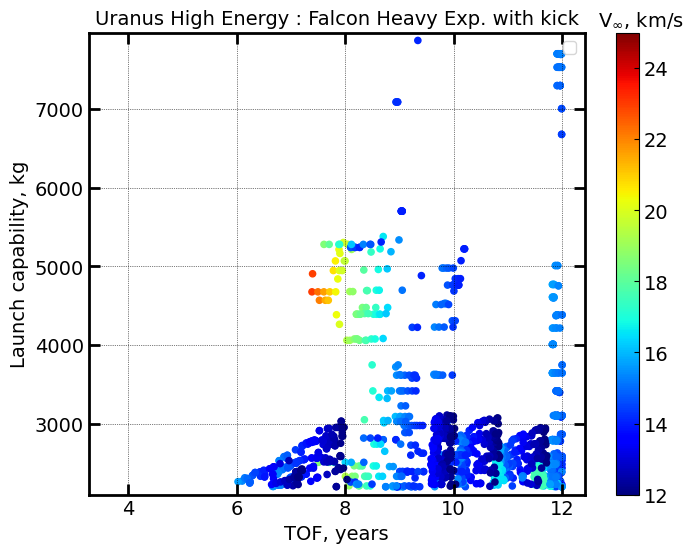

In [112]:
interplanetary1.plot_launch_mass_vs_TOF_with_vinf_colorbar(launcherObj=launcher1)

It appears that there is small set of trajectories (indicated by yellow and red markers) which satisfy the following constraints:

1. Launch capability >= 5000 kg with Falcon Heavy Expendable. (corresponding to $C_3$ <= 55)
2. TOF <= 8 years.
3. Arrival $V_{\infty}$ >= 20 km/s, and $V_{\infty}$ <= 24 km/s.

We perform a query on the interplanetary trajectory dataset to filter these trajectories.

## Baseline Interplanetary Trajectory

In [113]:
df = interplanetary1.df
df[(df["TOF"]<=8) & (df["Avinf"]>=20) & (df["Avinf"]<=24) & (df["LC3"]<=55)]

Bodies                                         Times  \
11717  [399 399 599 799]   2031-07-18 2034-05-16 2035-09-09 2039-06-07   
11740  [399 399 599 799]   2031-07-22 2034-05-16 2035-09-04 2039-05-18   
11745  [399 399 599 799]   2031-07-22 2034-05-24 2035-09-14 2039-06-17   

          Lcdate Arrival Date     LC3       TOF  DSMdv    DSM Mass  \
11717 2031-07-18   2039-06-07  52.266  7.886090   1.04  864.379658   
11740 2031-07-22   2039-05-18  53.866  7.820462   1.04  864.379658   
11745 2031-07-22   2039-06-17  52.823  7.902598   0.84  675.544505   

                                      ArrivalVinf_Vector   Avinf       Adec  \
11717  [-9.511251449584961 17.8606014251709 0.2777369...  20.237 -48.836271   
11740  [-9.630807876586914 18.130252838134766 0.28104...  20.531 -48.894486   
11745  [-9.463287353515625 17.745807647705078 0.27622...  20.113 -48.803860   

       Unnamed: 11 Paths  Unnamed: 13 Unnamed: 14  
11717          NaN   NaN          NaN         NaN  
11740          NaN   NaN          NaN         NaN  
11745          NaN   NaN          NaN         NaN

We see that these trajectories belong to a group of EEJU trajectories launching between July and August 2031. For preliminary analysis, we arbitrarily choose trajectory #11740 as the initial baseline. We will now use the **AMAT.arrival** module to compute the arrival $V_{\infty}$ and arrival declination for this trajectory.

In [114]:
from astropy.time import Time
from AMAT.arrival import Arrival

arrival = Arrival()
arrival.set_vinf_vec_from_lambert_arc('JUPITER',
                                      'URANUS',
                                      Time("2035-09-04 00:00:00", scale='tdb'),
                                      Time("2039-05-18 00:00:00", scale='tdb'))

In [115]:
arrival.v_inf_vec

array([-9.62521831, 16.51192666,  7.46493598])

In [116]:
arrival.declination

-48.89326200262988

We now compute an approach trajectory that minimizes the inclination of the initial capture orbit with respect to Uranus' equatorial plane. Note that the entry conditions (except the EFPA) is required to compute the aerocapture ebtry corridor, and hence this must be done iteratively. We arbitrarily choose an initial periapsis radius = 400 km which results in a planet-relative EFPA of -11.1 deg.

In [117]:
import numpy as np
from AMAT.approach import Approach

## Atmospheric Entry State

In [118]:
approach1 = Approach("URANUS", v_inf_vec_icrf_kms=arrival.v_inf_vec,
                            rp=(25559+400)*1e3, psi=np.pi,
                            is_entrySystem=True, h_EI=1000e3)

print("Entry altitude, km: "+ str(approach1.h_EI/1e3))
print("Entry longitude BI, deg: "+ str(round(approach1.longitude_entry_bi*180/np.pi, 2)))
print("Entry latitude BI, deg: "+ str(round(approach1.latitude_entry_bi*180/np.pi, 2)))
print("Atm. relative entry speed, km/s: "+str(round(approach1.v_entry_atm_mag/1e3, 4)))
print("Atm. relative heading angle, deg: "+str(round(approach1.heading_entry_atm*180/np.pi, 4)))
print("Atm. relative EFPA, deg: "+str(round(approach1.gamma_entry_atm*180/np.pi, 4)))

print("Inclination, deg: "+str(approach1.i*180/np.pi))

Entry altitude, km: 1000.0
Entry longitude BI, deg: -15.22
Entry latitude BI, deg: 75.55
Atm. relative entry speed, km/s: 29.2877
Atm. relative heading angle, deg: 88.687
Atm. relative EFPA, deg: -10.5331
Inclination, deg: 90.0


Run the file ```example-76-uranus-approach.py``` for a visualization of the Uranus approach trajectory.

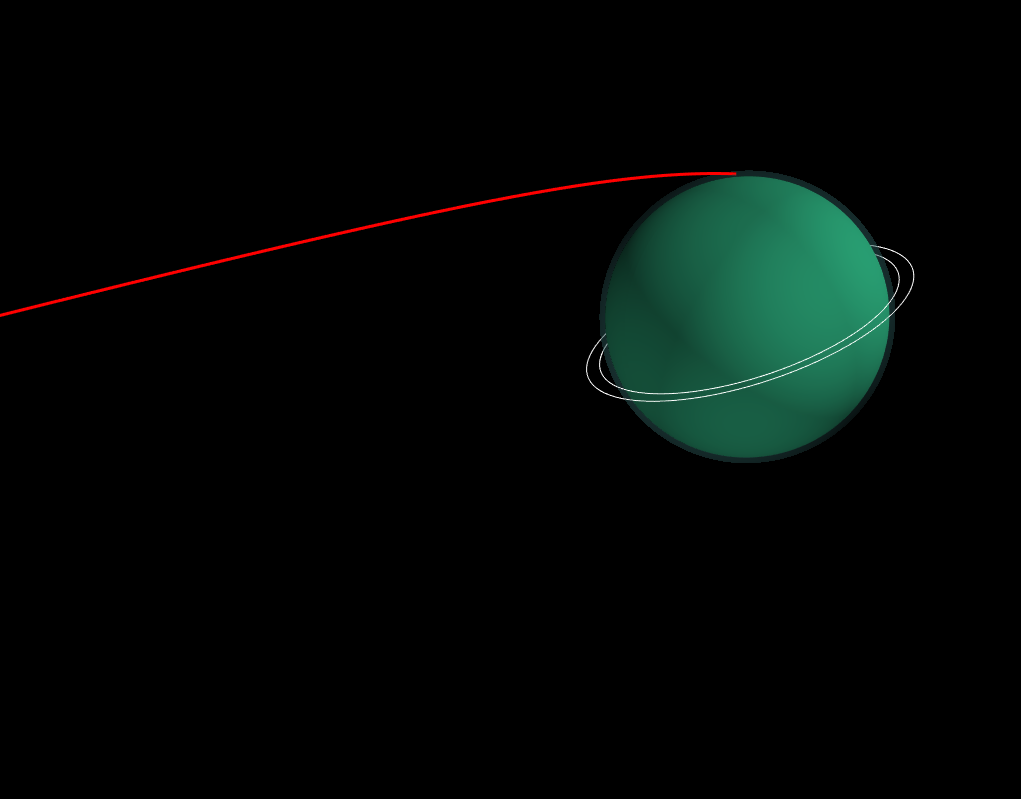

In [119]:
Image(filename="../plots/example-76-uranus-approach.png", width=700)

Using the above entry conditions at Uranus atmospheric interface, we use **AMAT.vehicle** module to compute the aerocapture entry corridor for a vehicle with L/D = 0.24 and a nominal mean atmospheric profile for Uranus.

## Corridor Width and Limiting Trajectories

In [120]:
# setup the Planet object
from AMAT.planet import Planet
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_low = 120e3
planet.h_trap= 100e3

In [121]:
# Setup the vehicle object : assume m=3000 kg, beta=200 kg/m2
from AMAT.vehicle import Vehicle
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

In [122]:
# Compute the corridor bounds and TCW
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

In [28]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.0088 deg
Undershoot limit : -12.0264 deg
TCW: 1.0176 deg


In [29]:
# propogate the overshoot and undershoot trajectories
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,overShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,180.0)

# Extract and save variables to plot
t_min_os         = vehicle.t_minc
h_km_os          = vehicle.h_kmc
acc_net_g_os     = vehicle.acc_net_g
q_stag_con_os    = vehicle.q_stag_con
q_stag_rad_os    = vehicle.q_stag_rad
heatload_os      = vehicle.heatload

vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,underShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,0.0)

# Extract and save variable to plot
t_min_us         = vehicle.t_minc
h_km_us          = vehicle.h_kmc
acc_net_g_us     = vehicle.acc_net_g
q_stag_con_us    = vehicle.q_stag_con
q_stag_rad_us    = vehicle.q_stag_rad
heatload_us      = vehicle.heatload

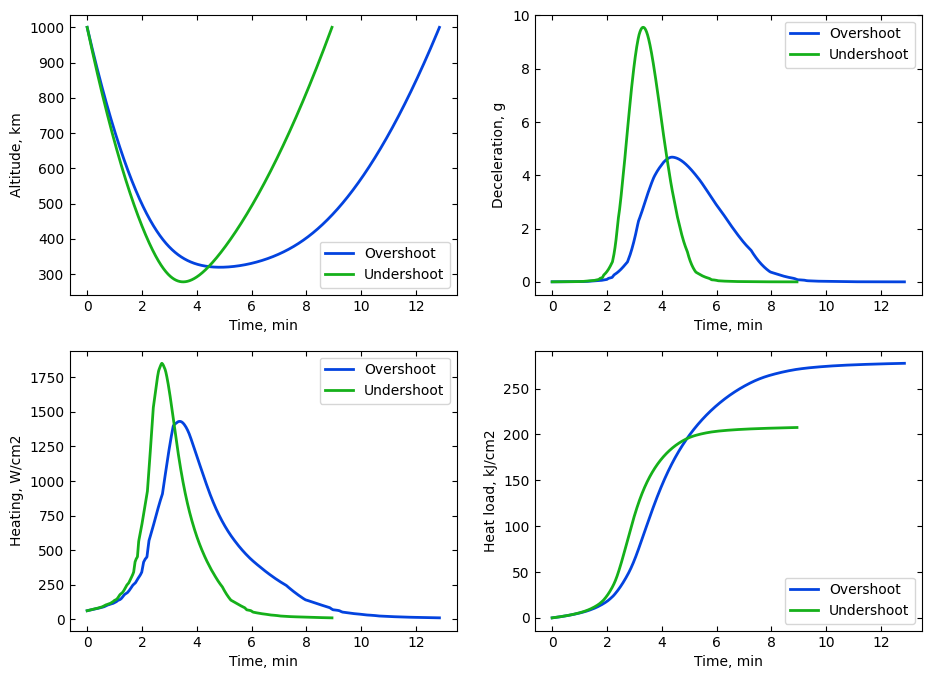

In [30]:
# plot overshoot and undershoot trajectories
fig = plt.figure()
fig.set_size_inches([11 , 8])
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

plt.subplot(2, 2, 1)
plt.plot(t_min_os , h_km_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , h_km_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Altitude, km",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='lower right', fontsize=10)


plt.subplot(2, 2, 2)
plt.plot(t_min_os , acc_net_g_os , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , acc_net_g_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Deceleration, g",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 3)
plt.plot(t_min_os , q_stag_con_os+q_stag_rad_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , q_stag_con_us+q_stag_rad_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Heating, W/cm2",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 4)
plt.plot(t_min_os , heatload_os/1e3 , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , heatload_us/1e3, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Heat load, kJ/cm2",fontsize=10)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.legend(loc='lower right', fontsize=10)


plt.show()

## Effect of mean density variations

In [31]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [32]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [34]:
ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert = planet.loadMonteCarloDensityFile2('../atmdata/Uranus/uranus-gram-mean-density-variations.txt', 0, 1, 2, 3, 4, heightInKmFlag=True)
density_int_low = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert, -3.0, 2201, 1)
density_int_avg = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert,  0.0, 2201, 1)
density_int_hig = planet.loadAtmosphereModel5(ATM_height, ATM_density_low, ATM_density_avg, ATM_density_high, ATM_density_pert, +3.0, 2201, 1)

In [35]:
planet1 = Planet('URANUS')
planet2 = Planet('URANUS')
planet3 = Planet('URANUS')

planet1.density_int = density_int_low
planet2.density_int = density_int_avg
planet3.density_int = density_int_hig

In [36]:
h_array = np.linspace(0, 1000e3, 1001)

d_min_arr = planet1.densityvectorized(h_array)
d_avg_arr = planet2.densityvectorized(h_array)
d_max_arr = planet3.densityvectorized(h_array)

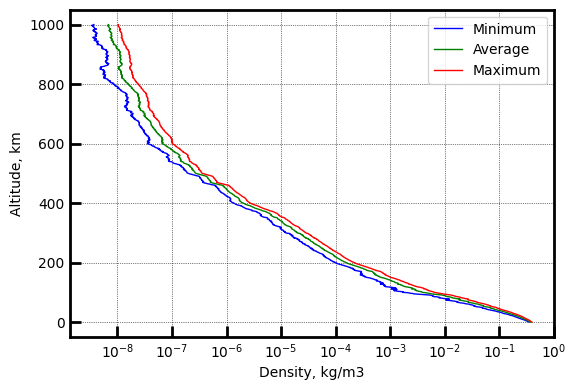

In [37]:
fig = plt.figure()
fig.set_size_inches([6.25, 4.25])
plt.plot(d_min_arr, h_array*1E-3, 'b-', linewidth=1.0, label="Minimum")
plt.plot(d_avg_arr, h_array*1E-3, 'g-', linewidth=1.0, label="Average")
plt.plot(d_max_arr, h_array*1E-3, 'r-', linewidth=1.0, label="Maximum")
plt.xlabel("Density, kg/m3",fontsize=10)
plt.ylabel("Altitude, km",fontsize=10)
plt.xscale('log')
plt.yticks(fontsize=10)
plt.xticks(np.logspace(-8, 0, 9), fontsize=10)
plt.grid('on',linestyle='-', linewidth=0.2)

ax=plt.gca()
ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)
ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

for axis in ['top', 'bottom', 'left', 'right']:
    ax.spines[axis].set_linewidth(2)
    
plt.legend(loc='upper right', fontsize=10, framealpha=0.8)
plt.show()

In [38]:
planet.density_int = density_int_low

vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.3102 deg
Undershoot limit : -12.3240 deg
TCW: 1.0138 deg


In [39]:
planet.density_int = density_int_avg

vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -11.1238 deg
Undershoot limit : -12.1418 deg
TCW: 1.0180 deg


In [40]:
planet.density_int = density_int_hig

vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

# Compute the corridor bounds and TCW for low density atnosphere
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,500e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,500e3)

# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -10.9809 deg
Undershoot limit : -12.0031 deg
TCW: 1.0221 deg


## Target EFPA selection

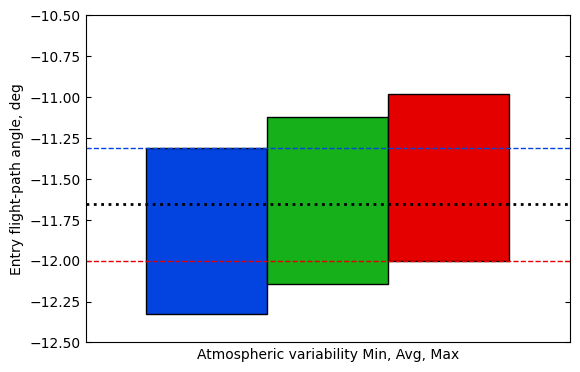

In [41]:
from matplotlib.patches import Polygon

fig = plt.figure()
fig.set_size_inches([6.25,4.25])
     
ax = plt.gca()


x1 = [1.0, 1.0, 2.0, 2.0]
y1 = [-12.3240, -11.3102, -11.3102, -12.3240]

x2 = [2.0, 2.0, 3.0, 3.0]
y2 = [-12.1418,-11.1238, -11.1238,  -12.1418]

x3 = [3.0, 3.0, 4.0, 4.0]
y3 = [-12.0031, -10.9809 , -10.9809 , -12.0031]



poly1 = Polygon( list(zip(x1,y1)), facecolor='xkcd:blue', edgecolor='k')
ax.add_patch(poly1)

poly2 = Polygon( list(zip(x2,y2)), facecolor='xkcd:green', edgecolor='k')
ax.add_patch(poly2)

poly3 = Polygon( list(zip(x3,y3)), facecolor='xkcd:red', edgecolor='k')
ax.add_patch(poly3)


plt.ylabel("Entry flight-path angle, deg",fontsize=10)
plt.xlabel("Atmospheric variability Min, Avg, Max",fontsize=10)

plt.tick_params(axis='x',          # changes apply to the x-axis
                which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) 

plt.axhline(y=-11.3102, linewidth=1.0, linestyle='dashed' ,color='xkcd:blue')
plt.axhline(y=-12.0031, linewidth=1.0, linestyle='dashed' ,color='xkcd:red')
plt.axhline(y=0.5*(-11.3102+-12.0031), linewidth=2.0, linestyle='dotted' ,color='xkcd:black')

ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')


ax.set_xlim([0.5, 4.5])
ax.set_ylim([-12.5, -10.5])


plt.show()

In [42]:
0.5*(-11.3102+-12.0031)

-11.656649999999999

## Guidance parameter selection

In [43]:
planet = Planet('URANUS')
planet.loadAtmosphereModel('../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_skip = 1000.0E3
planet.h_low  = 120e3
planet.h_trap = 100e3

In [44]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.8 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


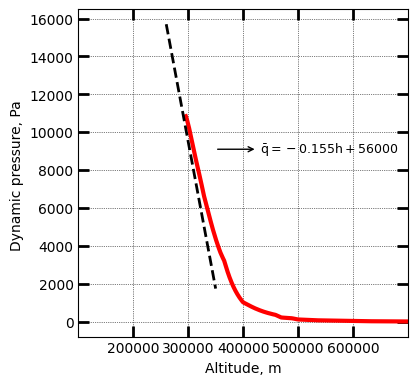

In [45]:
vehicle.propogateEntry2(200, 0.1, 0)

# Values for -13.64 deg, these are the linear fit 
# y = ax + b parameters used to compute Ghdot and Gq (see refs.)
a = -0.155
b =  56000

x_arr = np.linspace(260.0E3,350.0E3,101)
y_arr = a*x_arr + b

fig = plt.figure()
fig.set_size_inches([4.25,4.25])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)

plt.plot(vehicle.h_kmc*1E3,vehicle.dyn_pres_atm*1.01325E5,'r-',linewidth=3.0)

plt.xlim(100.0E3, 700.0E3)
#plt.ylim(0.0,12500.0)

plt.plot(x_arr,y_arr,color='k',linewidth=2.0,linestyle='dashed')
plt.xlabel("Altitude, m", fontsize=10)
plt.ylabel("Dynamic pressure, Pa ",fontsize=10)

plt.xticks(np.array([200.0E3 ,300E3, 400.00E3,  500e3, 600.0E3]),fontsize=10)

ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=10)
ax.tick_params(axis='y',labelsize=10)
ax.tick_params(direction='in')

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')
ax.xaxis.set_tick_params(width=2, length=8)
ax.yaxis.set_tick_params(width=2, length=8)
ax.xaxis.set_tick_params(width=1, length=6, which='minor')
ax.yaxis.set_tick_params(width=1, length=6, which='minor')
ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)

ax.annotate(r'$\bar{q} = -0.155h + 56000$',
    xy=(348586, 9103.4) ,
    xytext=(431181, 9103.4),
    arrowprops=dict(arrowstyle="<-"),  va="center", ha="left", fontsize=9)

plt.show()

In [46]:
0.05**2*200/(0.36*0.155)

8.960573476702512

In [47]:
2*1.5*0.05*200/0.36

83.33333333333334

## Target EFPA trade space studies

### EFPA = -11.8

In [64]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.8 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [65]:
# Set path to atmfiles with randomly perturbed atmosphere files.
atmfiles = ['../atmdata/Uranus/perturbed/G-01.txt',
            '../atmdata/Uranus/perturbed/G-02.txt',
            '../atmdata/Uranus/perturbed/G-03.txt',
            '../atmdata/Uranus/perturbed/G-04.txt',
            '../atmdata/Uranus/perturbed/G-05.txt']

In [66]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.80, 0.11, 0.24, 0.013, 0.5, 0.1, 2400.0)

In [67]:
vehicle.runMonteCarlo2(100, '../data/uranus2022/MCBX6')

RUN #: 1, SAMPLE #: 124, EFPA: -11.87, SIGMA: -0.73, LD: 0.27, APO : 489178.15
RUN #: 2, SAMPLE #: 59, EFPA: -11.96, SIGMA: -0.49, LD: 0.25, APO : 555434.96
RUN #: 3, SAMPLE #: 186, EFPA: -11.83, SIGMA: 0.70, LD: 0.24, APO : 521588.42
RUN #: 4, SAMPLE #: 168, EFPA: -11.56, SIGMA: -0.31, LD: 0.23, APO : 553822.98
RUN #: 5, SAMPLE #: 75, EFPA: -11.77, SIGMA: 0.52, LD: 0.23, APO : 587262.09
RUN #: 6, SAMPLE #: 166, EFPA: -11.81, SIGMA: -0.74, LD: 0.24, APO : 611073.09
RUN #: 7, SAMPLE #: 66, EFPA: -11.87, SIGMA: -0.78, LD: 0.24, APO : 517974.55
RUN #: 8, SAMPLE #: 192, EFPA: -11.73, SIGMA: -0.13, LD: 0.25, APO : 536335.47
RUN #: 9, SAMPLE #: 49, EFPA: -11.87, SIGMA: -0.53, LD: 0.25, APO : 527746.40
RUN #: 10, SAMPLE #: 189, EFPA: -11.74, SIGMA: 2.06, LD: 0.27, APO : 570224.99
RUN #: 11, SAMPLE #: 178, EFPA: -11.75, SIGMA: -0.11, LD: 0.22, APO : 536677.68
RUN #: 12, SAMPLE #: 184, EFPA: -11.75, SIGMA: 0.86, LD: 0.22, APO : 576590.40
RUN #: 13, SAMPLE #: 154, EFPA: -11.95, SIGMA: 0.75, LD: 

In [68]:
p1  = np.loadtxt('../data/uranus2022/MCBX6/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../data/uranus2022/MCBX6/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../data/uranus2022/MCBX6/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../data/uranus2022/MCBX6/q_stag_max_arr.txt')
h1  = np.loadtxt('../data/uranus2022/MCBX6/heatload_max_arr.txt')
u1  = np.loadtxt('../data/uranus2022/MCBX6/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../data/uranus2022/MCBX6/apoapsis_raise_DV_arr.txt')

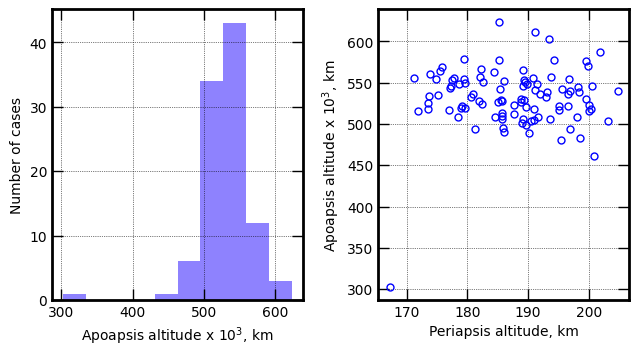

In [69]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=10)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

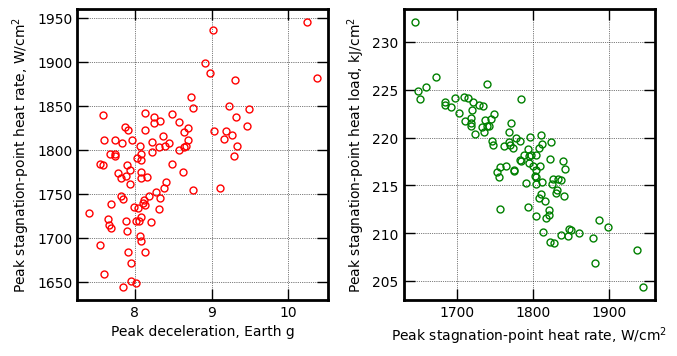

In [70]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=10)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

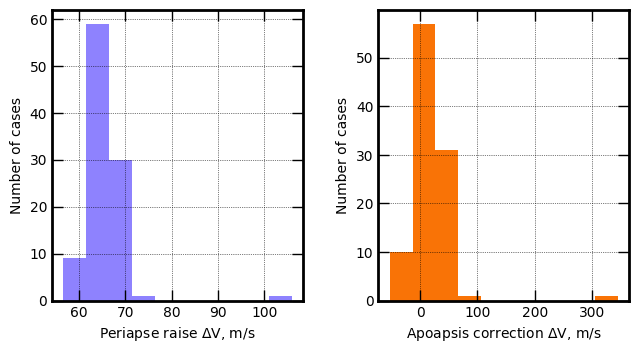

In [72]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].hist(v1, bins=10, color='xkcd:orange')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=10)
axes[1].set_ylabel('Number of cases', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

### Target EFPA = -11.7

In [77]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.7 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [78]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.70, 0.10, 0.24, 0.013, 0.5, 0.1, 2400.0)

In [79]:
vehicle.runMonteCarlo2(100, '../data/uranus2022/MCBX7')

RUN #: 1, SAMPLE #: 148, EFPA: -11.85, SIGMA: 0.92, LD: 0.24, APO : 557826.65
RUN #: 2, SAMPLE #: 18, EFPA: -11.48, SIGMA: -1.23, LD: 0.25, APO : 519030.85
RUN #: 3, SAMPLE #: 29, EFPA: -11.58, SIGMA: -0.03, LD: 0.26, APO : 518680.67
RUN #: 4, SAMPLE #: 190, EFPA: -11.59, SIGMA: -1.19, LD: 0.26, APO : 509971.10
RUN #: 5, SAMPLE #: 191, EFPA: -11.60, SIGMA: 0.90, LD: 0.23, APO : 485353.20
RUN #: 6, SAMPLE #: 55, EFPA: -11.89, SIGMA: -0.39, LD: 0.25, APO : 499384.48
RUN #: 7, SAMPLE #: 157, EFPA: -11.97, SIGMA: 1.70, LD: 0.24, APO : 457233.10
RUN #: 8, SAMPLE #: 123, EFPA: -11.69, SIGMA: 1.64, LD: 0.24, APO : 524483.68
RUN #: 9, SAMPLE #: 53, EFPA: -11.77, SIGMA: -1.34, LD: 0.25, APO : 535265.77
RUN #: 10, SAMPLE #: 155, EFPA: -11.78, SIGMA: 0.88, LD: 0.26, APO : 474372.33
RUN #: 11, SAMPLE #: 19, EFPA: -11.74, SIGMA: -0.39, LD: 0.23, APO : 526235.81
RUN #: 12, SAMPLE #: 43, EFPA: -11.66, SIGMA: -0.65, LD: 0.22, APO : 585300.34
RUN #: 13, SAMPLE #: 63, EFPA: -11.75, SIGMA: 0.70, LD: 0.24

In [80]:
p1  = np.loadtxt('../data/uranus2022/MCBX7/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../data/uranus2022/MCBX7/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../data/uranus2022/MCBX7/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../data/uranus2022/MCBX7/q_stag_max_arr.txt')
h1  = np.loadtxt('../data/uranus2022/MCBX7/heatload_max_arr.txt')
u1  = np.loadtxt('../data/uranus2022/MCBX7/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../data/uranus2022/MCBX7/apoapsis_raise_DV_arr.txt')

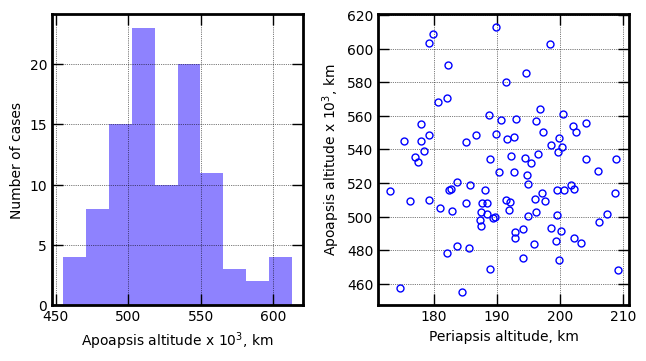

In [81]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=10)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

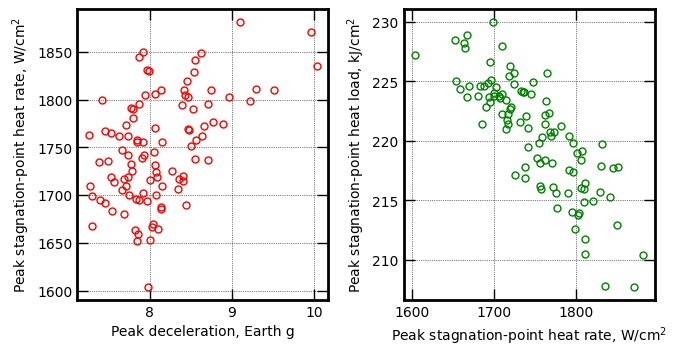

In [82]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=10)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

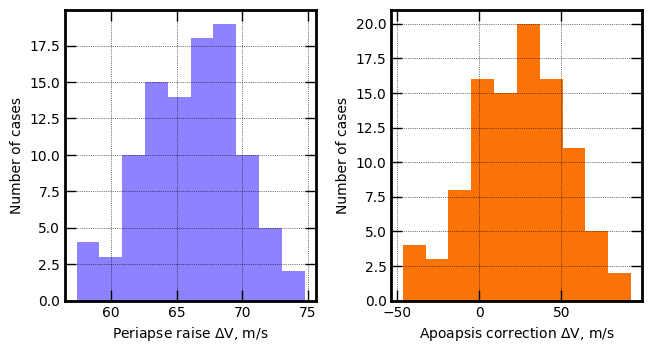

In [83]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].hist(v1, bins=10, color='xkcd:orange')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=10)
axes[1].set_ylabel('Number of cases', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

### Target EFPA = -11.6

In [84]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.7 ,0.0,0.0)
vehicle.setSolverParams(1E-6)
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 4000.0 km
# apoapsis = 550,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(4000.0, 550.0E3, 10.0E3)

In [85]:
vehicle.setupMonteCarloSimulation(1201, 200, atmfiles, 0, 1, 2, 3, 4, True, \
                                 -11.60, 0.10, 0.24, 0.013, 0.5, 0.1, 2400.0)

In [86]:
vehicle.runMonteCarlo2(100, '../data/uranus2022/MCBX8')

RUN #: 1, SAMPLE #: 112, EFPA: -11.60, SIGMA: -0.31, LD: 0.25, APO : 523280.63
RUN #: 2, SAMPLE #: 161, EFPA: -11.47, SIGMA: 0.26, LD: 0.23, APO : 536924.01
RUN #: 3, SAMPLE #: 42, EFPA: -11.67, SIGMA: -1.44, LD: 0.24, APO : 513805.04
RUN #: 4, SAMPLE #: 19, EFPA: -11.51, SIGMA: 0.74, LD: 0.24, APO : 497816.35
RUN #: 5, SAMPLE #: 165, EFPA: -11.71, SIGMA: -1.37, LD: 0.25, APO : 511353.66
RUN #: 6, SAMPLE #: 86, EFPA: -11.54, SIGMA: 0.41, LD: 0.24, APO : 513878.07
RUN #: 7, SAMPLE #: 101, EFPA: -11.71, SIGMA: -1.82, LD: 0.23, APO : 510529.49
RUN #: 8, SAMPLE #: 184, EFPA: -11.62, SIGMA: -0.88, LD: 0.24, APO : 515979.73
RUN #: 9, SAMPLE #: 16, EFPA: -11.74, SIGMA: -0.53, LD: 0.26, APO : 526750.12
RUN #: 10, SAMPLE #: 65, EFPA: -11.54, SIGMA: 0.21, LD: 0.25, APO : 508972.36
RUN #: 11, SAMPLE #: 39, EFPA: -11.64, SIGMA: 0.66, LD: 0.24, APO : 551921.57
RUN #: 12, SAMPLE #: 30, EFPA: -11.69, SIGMA: 0.39, LD: 0.22, APO : 491300.47
RUN #: 13, SAMPLE #: 82, EFPA: -11.45, SIGMA: -0.66, LD: 0.23,

In [88]:
p1  = np.loadtxt('../data/uranus2022/MCBX8/terminal_periapsis_arr.txt')
x1  = np.loadtxt('../data/uranus2022/MCBX8/terminal_apoapsis_arr.txt')
y1  = np.loadtxt('../data/uranus2022/MCBX8/acc_net_g_max_arr.txt')
z1  = np.loadtxt('../data/uranus2022/MCBX8/q_stag_max_arr.txt')
h1  = np.loadtxt('../data/uranus2022/MCBX8/heatload_max_arr.txt')
u1  = np.loadtxt('../data/uranus2022/MCBX8/periapsis_raise_DV_arr.txt')
v1  = np.loadtxt('../data/uranus2022/MCBX8/apoapsis_raise_DV_arr.txt')

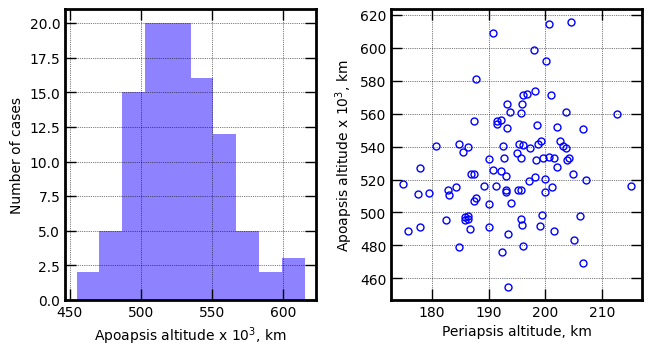

In [89]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(x1/1000.0, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)

axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)


axes[1].plot(p1, x1/1000.0, 'bo', markersize=5, mfc='None')

axes[1].set_xlabel('Periapsis altitude, km',fontsize=10)
axes[1].set_ylabel('Apoapsis altitude x '+r'$10^3$'+', km', fontsize=10)


axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)

for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

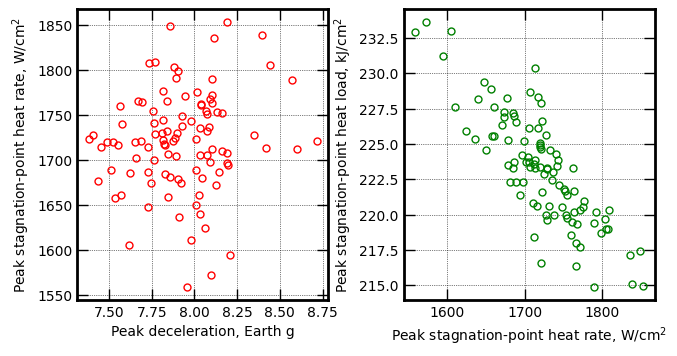

In [90]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].plot(y1, z1, 'ro', markersize=5, mfc='None')
axes[0].set_xlabel('Peak deceleration, Earth g', fontsize=10)
axes[0].set_ylabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].plot(z1, h1, 'go', markersize=5, mfc='None')
axes[1].set_xlabel('Peak stagnation-point heat rate, '+r'$W/cm^2$', fontsize=10)
axes[1].set_ylabel('Peak stagnation-point heat load, '+r'$kJ/cm^2$', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()

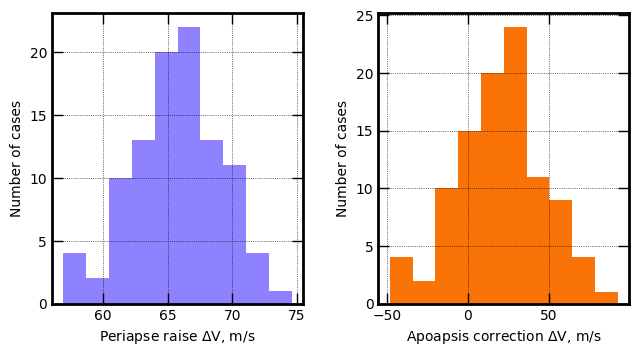

In [91]:
fig, axes = plt.subplots(1, 2, figsize = (6.5, 3.5))
fig.tight_layout()
plt.subplots_adjust(wspace=0.30)

axes[0].hist(u1, bins=10, color='xkcd:periwinkle')
axes[0].set_xlabel('Periapse raise '+r'$\Delta V$'+', m/s', fontsize=10)
axes[0].set_ylabel('Number of cases', fontsize=10)
axes[0].tick_params(direction='in')
axes[0].yaxis.set_ticks_position('both')
axes[0].xaxis.set_ticks_position('both')
axes[0].tick_params(axis='x',labelsize=10)
axes[0].tick_params(axis='y',labelsize=10)

axes[1].hist(v1, bins=10, color='xkcd:orange')
axes[1].set_xlabel('Apoapsis correction '+r'$\Delta V$'+', m/s', fontsize=10)
axes[1].set_ylabel('Number of cases', fontsize=10)
axes[1].tick_params(direction='in')
axes[1].yaxis.set_ticks_position('both')
axes[1].xaxis.set_ticks_position('both')
axes[1].tick_params(axis='x',labelsize=10)
axes[1].tick_params(axis='y',labelsize=10)



for ax in axes:
    ax.xaxis.set_tick_params(direction='in', which='both')
    ax.yaxis.set_tick_params(direction='in', which='both')
    ax.xaxis.set_tick_params(width=1, length=8)
    ax.yaxis.set_tick_params(width=1, length=8)
    ax.xaxis.set_tick_params(width=1, length=6, which='minor')
    ax.yaxis.set_tick_params(width=1, length=6, which='minor')
    ax.xaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.xaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    ax.yaxis.grid(which='major', color='k', linestyle='dotted', linewidth=0.5)
    ax.yaxis.grid(which='minor', color='k', linestyle='dotted', linewidth=0.0)
    
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(2)

plt.show()